In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
ds = df[['ENGINESIZE', 'CO2EMISSIONS']]
ds.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


In [4]:
msk = np.random.rand(len(ds)) < 0.8
train = ds[msk]
test = ds[~msk]

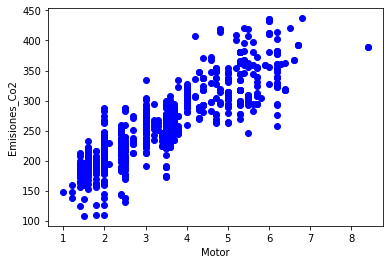

In [5]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Motor")
plt.ylabel("Emisiones_Co2")
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree = 3)
train_x_poly = poly.fit_transform(train_x)
test_x_poly = poly.fit_transform(test_x)

In [7]:
model = linear_model.LinearRegression()
train_y_gorro = model.fit(train_x_poly, train_y)

print("Varianza: ", model.coef_)
print("Bias: ", model.intercept_)

Varianza:  [[ 0.         25.06030108  5.26946915 -0.55829818]]
Bias:  [135.44552391]


Text(0, 0.5, 'Emisiones_Co2')

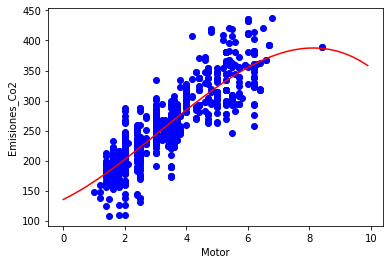

In [10]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = model.intercept_[0] + model.coef_[0][1] * XX + model.coef_[0][2] * np.power(XX,2) + model.coef_[0][3] * np.power(XX,3)
plt.plot(XX, yy, '-r')
plt.xlabel("Motor")
plt.ylabel("Emisiones_Co2")

In [11]:
from sklearn.metrics import r2_score

test_y_ = model.predict(test_x_poly)

print("Accuracy: %.3f" % r2_score(test_y_, test_y))

Accuracy: 0.699
